In [603]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import statsmodels.formula.api as smf
from datetime import datetime
import seaborn as sns

In [604]:
ks = pd.read_csv("/Users/josephmeyer/Desktop/ks-projects-201801-2.csv")
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [605]:
ks = ks.set_index('name')

In [606]:
ks = ks.drop(columns = ['ID'])

In [607]:
ks.loc[ks['usd pledged'].isnull(),:]
ks = ks.dropna(subset=['usd pledged'])

In [608]:
ks['launched'] = pd.to_datetime(ks['launched'])
ks['launched_date'], ks['launched_time'] = ks['launched'].dt.normalize(), ks['launched'].dt.time
ks=ks.drop(columns=['launched'])

In [609]:
ks['percent_funded'] = ks['usd_pledged_real'] / ks['goal']
ks

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded
name,,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0,GB,0.00,0.00,1533.95,2015-08-11,12:12:28,0.000000
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02,04:43:57,0.080700
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12,00:20:50,0.004889
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.00,failed,1,US,1.00,1.00,5000.00,2012-03-17,03:24:11,0.000200
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-07-04,08:35:03,0.065795
Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26,13:38:27,1.047500
Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-21,1000.0,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01,18:30:44,1.205000
Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,453.00,failed,40,US,453.00,453.00,25000.00,2016-02-01,20:05:12,0.018120
SPIN - Premium Retractable In-Ear Headphones with Mic,Product Design,Design,USD,2014-05-29,125000.0,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-04-24,18:14:43,0.065864


In [610]:
ks.dtypes

category                    object
main_category               object
currency                    object
deadline                    object
goal                       float64
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
launched_date       datetime64[ns]
launched_time               object
percent_funded             float64
dtype: object

In [611]:
pivot = pd.pivot_table(ks, 
                       values='goal', 
                       index=['main_category'],
                       columns=['state'], 
                       aggfunc="count")
# pivot1
pivot["Total"] = pivot.sum(axis=1)
pivot

state,canceled,failed,live,successful,suspended,Total
main_category,,,,,,
Art,2222,14131,194,11510,96,28153
Comics,842,4036,76,5842,23,10819
Crafts,843,5703,76,2115,72,8809
Dance,163,1235,18,2338,13,3767
Design,4152,14814,305,10549,247,30067
Fashion,2650,14181,250,5593,138,22812
Film & Video,5744,32892,332,23612,117,62697
Food,2209,15969,183,6085,153,24599
Games,6199,16003,287,12518,219,35226


In [612]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [613]:
# pivot.style.apply(highlight_max)
pivot1.style.apply(highlight_max,axis=1)
pivot1.style.apply(highlight_max,axis=0)

state,canceled,failed,live,successful,suspended,Total,Count
main_category,,,,,,,
Art,7.89259,50.1936,0.689092,40.8837,0.340994,100,28153
Comics,7.7826,37.3047,0.702468,53.9976,0.212589,100,10819
Crafts,9.56976,64.7406,0.862754,24.0095,0.817346,100,8809
Dance,4.32705,32.7847,0.477834,62.0653,0.345102,100,3767
Design,13.8092,49.27,1.0144,35.085,0.821499,100,30067
Fashion,11.6167,62.1647,1.09591,24.5178,0.604945,100,22812
Film & Video,9.16152,52.4618,0.529531,37.6605,0.186612,100,62697
Food,8.98004,64.9173,0.743933,24.7368,0.621977,100,24599
Games,17.5978,45.4295,0.814739,35.5363,0.6217,100,35226


In [614]:
pivot1 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['main_category'],
                       columns=['state'], 
                       aggfunc="count" 
                       #title = "Category vs. State"
                       )
# pivot1
pivot1["Total"] = pivot1.sum(axis=1)
pivot1 = pivot1.apply(lambda x: (x / pivot1["Total"])*100)
pivot1["Count"] = pivot['Total']
pivot1

state,canceled,failed,live,successful,suspended,Total,Count
main_category,,,,,,,
Art,7.892587,50.193585,0.689092,40.883742,0.340994,100.0,28153
Comics,7.782605,37.304742,0.702468,53.997597,0.212589,100.0,10819
Crafts,9.569758,64.740606,0.862754,24.009536,0.817346,100.0,8809
Dance,4.327051,32.784709,0.477834,62.065304,0.345102,100.0,3767
Design,13.809160,49.269964,1.014401,35.084977,0.821499,100.0,30067
Fashion,11.616693,62.164650,1.095914,24.517798,0.604945,100.0,22812
Film & Video,9.161523,52.461840,0.529531,37.660494,0.186612,100.0,62697
Food,8.980040,64.917273,0.743933,24.736778,0.621977,100.0,24599
Games,17.597797,45.429512,0.814739,35.536252,0.621700,100.0,35226


In [615]:
pivot1.sum(1)
#he thinks its like pd.divide

main_category
Art             28353.0
Comics          11019.0
Crafts           9009.0
Dance            3967.0
Design          30267.0
Fashion         23012.0
Film & Video    62897.0
Food            24799.0
Games           35426.0
Journalism       4954.0
Music           49730.0
Photography     10978.0
Publishing      39579.0
Technology      32762.0
Theater         11112.0
dtype: float64

In [616]:
pivot2 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['category'],
                       columns=['state'],
                       aggfunc="count")
pivot2

state,canceled,failed,live,successful,suspended
category,,,,,
3D Printing,91.0,326.0,8.0,242.0,15.0
Academic,115.0,589.0,11.0,188.0,13.0
Accessories,340.0,1667.0,53.0,1073.0,29.0
Action,109.0,514.0,7.0,107.0,3.0
Animals,18.0,166.0,3.0,63.0,5.0
Animation,306.0,1531.0,16.0,682.0,6.0
Anthologies,37.0,216.0,9.0,521.0,1.0
Apparel,864.0,4751.0,109.0,1414.0,27.0
Apps,952.0,4909.0,79.0,378.0,27.0


In [617]:
pivot3 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['main_category'],
                       columns=['currency'], 
                       aggfunc="count")
pivot3

currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
main_category,,,,,,,,,,,,,,
Art,425.0,1067.0,48.0,89.0,1083.0,2667.0,34.0,2.0,160.0,34.0,91.0,112.0,30.0,22311.0
Comics,188.0,521.0,6.0,15.0,204.0,867.0,8.0,NaN,35.0,17.0,16.0,25.0,7.0,8910.0
Crafts,183.0,426.0,22.0,33.0,391.0,904.0,12.0,NaN,63.0,17.0,43.0,37.0,30.0,6648.0
Dance,32.0,94.0,4.0,3.0,78.0,280.0,1.0,NaN,24.0,7.0,8.0,7.0,1.0,3228.0
Design,929.0,1500.0,132.0,175.0,2052.0,2706.0,236.0,8.0,108.0,62.0,157.0,172.0,140.0,21690.0
Fashion,717.0,1060.0,65.0,77.0,1434.0,2372.0,45.0,8.0,76.0,41.0,101.0,128.0,104.0,16584.0
Film & Video,940.0,1703.0,55.0,112.0,1373.0,5782.0,10.0,1.0,317.0,75.0,189.0,202.0,16.0,51922.0
Food,477.0,1047.0,50.0,60.0,989.0,1649.0,10.0,NaN,102.0,48.0,100.0,103.0,23.0,19941.0
Games,961.0,1884.0,65.0,105.0,2727.0,4012.0,76.0,10.0,148.0,85.0,183.0,275.0,59.0,24636.0


In [618]:
pivot4 = pd.pivot_table(ks, 
                       values='pledged', 
                       index=['main_category'], # rows
                       columns=['state'], # columns
                       aggfunc="sum") # aggregation function
pivot4["Total"] = pivot4.sum(axis=1)
pivot4

state,canceled,failed,live,successful,suspended,Total
main_category,,,,,,
Art,1306467.79,9293212.28,490233.88,9.019783e+07,259287.80,1.015470e+08
Comics,780990.81,4134903.81,181975.75,6.953712e+07,8661.00,7.464365e+07
Crafts,359722.91,2375393.38,117122.11,1.485156e+07,56499.70,1.776030e+07
Dance,88079.75,819773.35,16313.00,1.297813e+07,4432.00,1.390673e+07
Design,21205322.66,48848704.85,9382262.03,7.308193e+08,5223300.50,8.154789e+08
Fashion,4669842.33,13437681.54,878732.45,1.298691e+08,554002.49,1.494093e+08
Film & Video,10286514.45,51915346.42,716675.84,3.396796e+08,289132.94,4.028873e+08
Food,2391645.96,17830145.07,761819.11,1.097733e+08,621527.63,1.313784e+08
Games,26092364.35,39819404.50,2357852.79,7.012404e+08,770778.30,7.702808e+08


In [619]:
pivot5 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['main_category'],
                       columns=['currency'],
                       aggfunc=sum) 
pivot5

currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
main_category,,,,,,,,,,,,,,
Art,41600841.0,128832109.0,5260538.0,3726381.0,167444401.0,18959165.0,7061900.0,1000000.0,19938669.0,11741277.0,940497.0,8204813.0,148161.0,7.346052e+08
Comics,1866121.0,4267060.0,34000.0,809975.0,2416600.0,4158202.0,85622.0,NaN,4689320.0,1135560.0,128100.0,2354749.0,57400.0,1.970133e+08
Crafts,2753098.0,4406893.0,392600.0,2398600.0,4566195.0,5369468.0,485388.0,NaN,6971399.0,474121.0,802331.0,2243750.0,186536.0,7.106607e+07
Dance,152645.0,2134235.0,15240.0,187000.0,1090770.0,1628237.0,45000.0,NaN,2514300.0,751000.0,91500.0,54900.0,20000.0,3.016595e+07
Design,38435013.0,69342025.0,6192702.0,28035225.0,72463005.0,65919676.0,37965137.0,8564000.0,17693288.0,10701539.0,6769438.0,84501535.0,2547801.0,9.560749e+08
Fashion,12002458.0,19348553.0,2025540.0,8291480.0,51572476.0,27866995.0,4397129.0,7791870.0,10096245.0,4257500.0,1450305.0,42208978.0,1274755.0,3.735538e+08
Film & Video,105221792.0,248673776.0,58508822.0,26528188.0,174513909.0,333823123.0,4820000.0,5500000.0,41818946.0,12694378.0,3502756.0,167775971.0,903388.0,4.174181e+09
Food,30419597.0,39055580.0,102441497.0,11974135.0,58284428.0,146106053.0,2005000.0,NaN,17754910.0,13509519.0,4245552.0,43372030.0,356620.0,7.283746e+08
Games,60008492.0,58115591.0,1475028.0,17763907.0,86069249.0,94120323.0,13765124.0,24030000.0,24128158.0,115730750.0,5500706.0,67757581.0,967943.0,1.217034e+09


In [620]:
pivot6 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['category'], 
                       columns=['country'],
                       aggfunc="count")
pivot6

country,AT,AU,BE,CA,CH,DE,DK,ES,FR,GB,...,IT,JP,LU,MX,NL,NO,NZ,SE,SG,US
category,,,,,,,,,,,,,,,,,,,,,
3D Printing,5.0,19.0,2.0,44.0,1.0,24.0,3.0,11.0,16.0,69.0,...,24.0,NaN,2.0,4.0,27.0,2.0,5.0,2.0,2.0,407.0
Academic,1.0,22.0,3.0,50.0,2.0,34.0,1.0,16.0,10.0,92.0,...,13.0,NaN,1.0,14.0,12.0,5.0,2.0,14.0,1.0,618.0
Accessories,3.0,127.0,6.0,209.0,23.0,44.0,14.0,55.0,54.0,359.0,...,89.0,2.0,1.0,15.0,40.0,13.0,21.0,38.0,30.0,1994.0
Action,2.0,19.0,2.0,36.0,NaN,12.0,1.0,5.0,4.0,97.0,...,4.0,NaN,NaN,1.0,10.0,3.0,3.0,7.0,NaN,531.0
Animals,NaN,11.0,1.0,18.0,NaN,6.0,NaN,1.0,2.0,34.0,...,5.0,NaN,NaN,2.0,6.0,2.0,2.0,4.0,NaN,158.0
Animation,3.0,44.0,5.0,105.0,4.0,13.0,4.0,10.0,19.0,231.0,...,9.0,NaN,NaN,19.0,9.0,3.0,8.0,10.0,2.0,2034.0
Anthologies,1.0,23.0,1.0,52.0,NaN,7.0,NaN,7.0,2.0,90.0,...,3.0,NaN,NaN,8.0,1.0,1.0,2.0,7.0,1.0,572.0
Apparel,17.0,258.0,18.0,361.0,13.0,117.0,18.0,59.0,66.0,716.0,...,56.0,2.0,1.0,25.0,86.0,12.0,33.0,40.0,31.0,5214.0
Apps,25.0,300.0,26.0,372.0,47.0,160.0,52.0,105.0,149.0,645.0,...,146.0,1.0,2.0,80.0,132.0,34.0,50.0,55.0,17.0,3910.0


pivot tables with percentages as opposed to numbers 

Text(0.5,0,'Percent Funded')

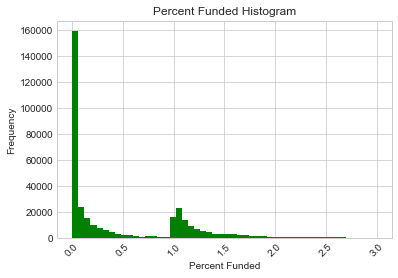

In [621]:
# print(ks["percent_funded"].mean())
fig,ax = plt.subplots(1)
ks["percent_funded"][ks.percent_funded<3].plot.hist(bins = 50, color='green', ax=ax, title="Percent Funded Histogram", rot =45)
ax.set_xlabel("Percent Funded")

In [622]:
ks['percent_funded'].head(10).ascending=True

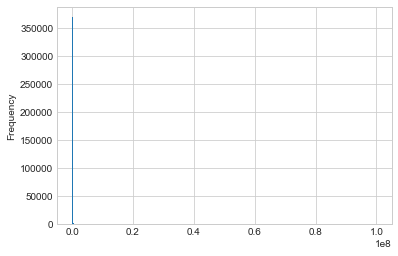

In [623]:
ks['goal'].plot.hist(bins=400)

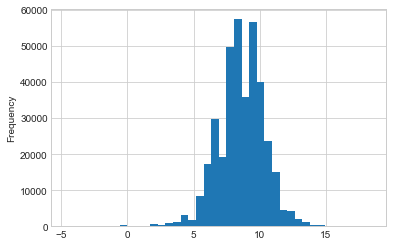

In [624]:
np.log(ks['goal']).plot.hist(bins=40)

In [625]:
ks["goal"][ks.goal<10].value_counts()

1.00    430
5.00    142
2.00     24
3.00     20
8.00     19
7.00     18
9.00     14
6.00      9
4.00      9
0.01      2
0.15      1
1.85      1
0.50      1
Name: goal, dtype: int64

In [626]:
ks2 = ks[(ks['goal'] < 10)]

In [627]:
ks2

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded
name,,,,,,,,,,,,,,,
Wholesters- A new way to Whold your things!,Fashion,Fashion,USD,2011-05-29,1.00,566.00,successful,3,US,566.00,566.00,1.00,2011-04-29,01:03:16,566.000000
3mm Aluminum Pick Plectrum,Music,Music,CAD,2014-03-24,1.00,20.00,successful,9,CA,17.99,18.12,0.91,2014-02-22,23:28:33,18.120000
A Big Dream of a Little Man - Alex Oddman's Debute Album,Music,Music,USD,2017-01-19,1.00,7.00,canceled,1,US,7.00,7.00,1.00,2016-12-20,22:01:21,7.000000
Tons Of Music For A Buck!!!,Rock,Music,USD,2015-08-15,1.00,113.00,successful,13,US,113.00,113.00,1.00,2015-07-16,23:41:20,113.000000
Project Penny,Crafts,Crafts,USD,2014-09-25,5.00,29.00,successful,8,US,29.00,29.00,5.00,2014-09-10,19:11:33,5.800000
Tale Of Tails,Publishing,Publishing,USD,2015-05-02,1.00,0.00,failed,0,US,0.00,0.00,1.00,2015-04-02,18:40:40,0.000000
Kenophania: How A Song Is Created (Interactive Experience),Audio,Journalism,GBP,2017-11-19,1.00,698.91,successful,89,GB,23.20,931.43,1.33,2017-11-01,20:03:10,931.430000
Potato Salad 2,Bacon,Food,USD,2014-08-16,9.00,0.00,failed,0,US,0.00,0.00,9.00,2014-07-17,23:19:12,0.000000
The Forest or: How I Learned to Love the Pine Beetle,Film & Video,Film & Video,USD,2015-04-26,1.00,167.00,successful,9,US,167.00,167.00,1.00,2015-04-20,17:03:18,167.000000


In [628]:
ks2.loc[:,"goal"].mean()

2.528289855072464

In [629]:
ks2.state.value_counts()
# show pie charts of ks2 vs ks regular

successful    475
failed         96
canceled       88
suspended      25
live            6
Name: state, dtype: int64

In [630]:
ks.state.value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

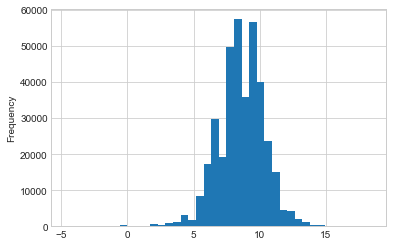

In [631]:
np.log(ks['goal']).plot.hist(bins=40)

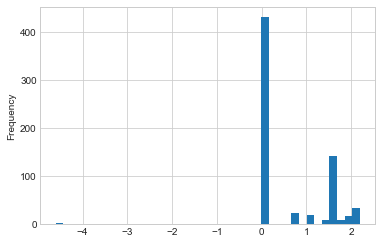

In [632]:
np.log(ks2['goal']).plot.hist(bins=40)

In [633]:
ks4 = ks.pledged.replace("0.00"," 0.001")

In [634]:
ks4

name
The Songs of Adelaide & Abullah                                                0.00
Greeting From Earth: ZGAC Arts Capsule For ET                               2421.00
Where is Hank?                                                               220.00
ToshiCapital Rekordz Needs Help to Complete Album                              1.00
Community Film Project: The Art of Neighborhood Filmmaking                  1283.00
Monarch Espresso Bar                                                       52375.00
Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co                1205.00
Chaser Strips. Our Strips make Shots their B*tch!                            453.00
SPIN - Premium Retractable In-Ear Headphones with Mic                       8233.00
STUDIO IN THE SKY - A Documentary Feature Film (Canceled)                   6240.57
Of Jesus and Madmen                                                            0.00
Lisa Lim New CD!                                                       

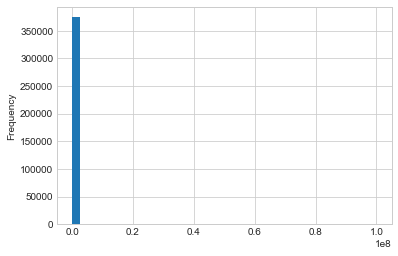

In [635]:
ks['goal'].plot.hist(bins=40)

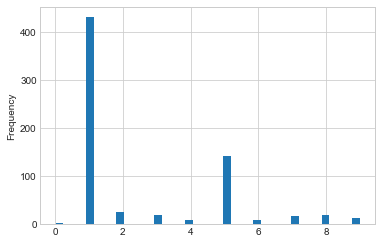

In [636]:
ks2['goal'].plot.hist(bins=40)

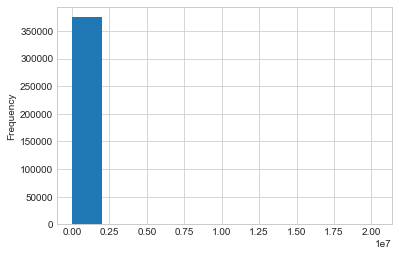

In [637]:
ks['pledged'].plot.hist(bins=10)

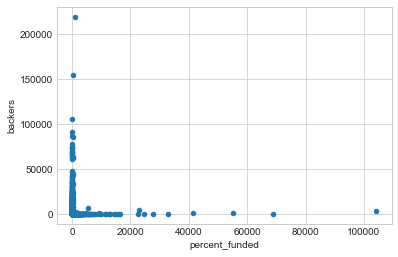

In [638]:
ks.plot(
    
    kind='scatter', 
    x="percent_funded", 
    y="backers", 
)



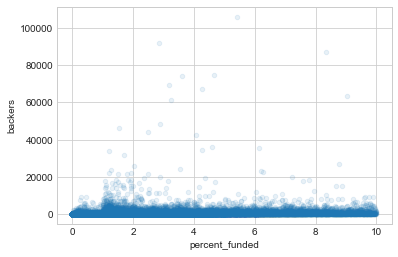

In [639]:
ks[ks.percent_funded<10].plot(
    
    kind='scatter', 
    x="percent_funded", 
    y="backers", 
    alpha = .1
)



In [640]:
ks_adjustedforscatter = ks[ks.percent_funded<3]

In [641]:
ks_adjustedforscatter2 = ks_adjustedforscatter[ks_adjustedforscatter.backers<1000]

Text(0,0.5,'Backers')

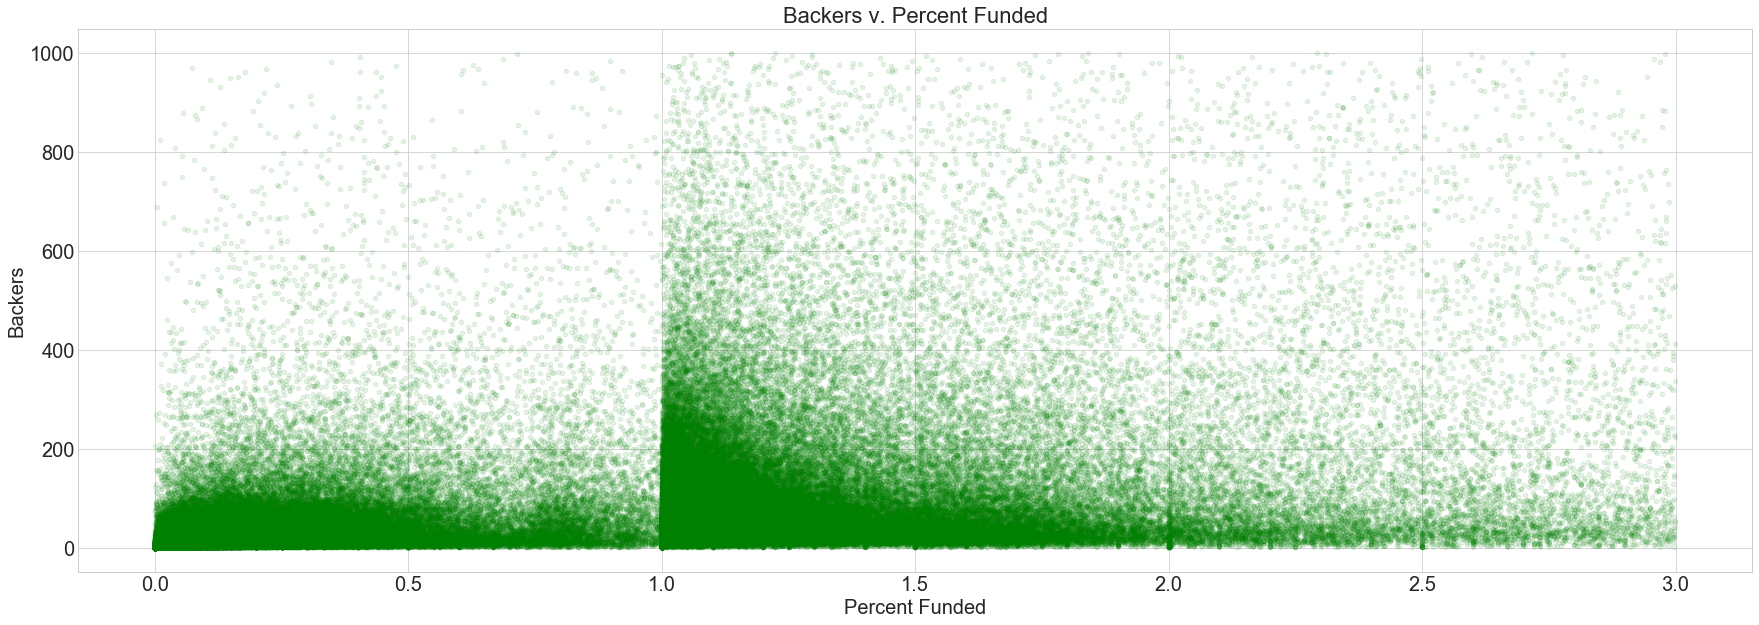

In [642]:
fig,ax = plt.subplots(1)
ks_adjustedforscatter2.plot(ax=ax,
    
    kind='scatter', 
    x="percent_funded",
    y="backers",
    fontsize = 20,
    alpha = .1,
    color = "green",
    figsize = (30,10)
);
ax.set_title('Backers v. Percent Funded', fontsize=22)
ax.set_xlabel('Percent Funded', fontsize=20)
ax.set_ylabel('Backers', fontsize=20)

seeing if we can predict the percent funded or something similar using sklearn

In [645]:
from sklearn.cluster import KMeans

In [646]:
KMeans(n_clusters=10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [647]:
print(smf.ols('goal ~ state',data=ks).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   goal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     63.08
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.15e-53
Time:                        22:49:43   Log-Likelihood:            -5.7757e+06
No. Observations:              374864   AIC:                         1.155e+07
Df Residuals:                  374859   BIC:                         1.155e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8.623e+04   6

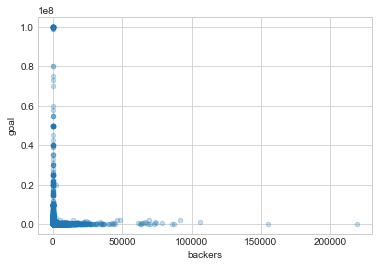

In [648]:
ks.plot.scatter(y='goal',x='backers',alpha=.25)

In [658]:
ks['deadline']=ks['deadline'].astype('datetime64[ns]')
ks['launched_date'] = ks['launched_date'].astype('datetime64[ns]')
ks['delta_time']=ks['deadline'].sub(ks['launched_date'], axis=0)
ks['delta_time']=ks.delta_time.dt.days

In [659]:
ks7=ks.loc[(ks["percent_funded"] < 3) & (ks["delta_time"] < 93)]

Text(0,0.5,'Percent Funded')

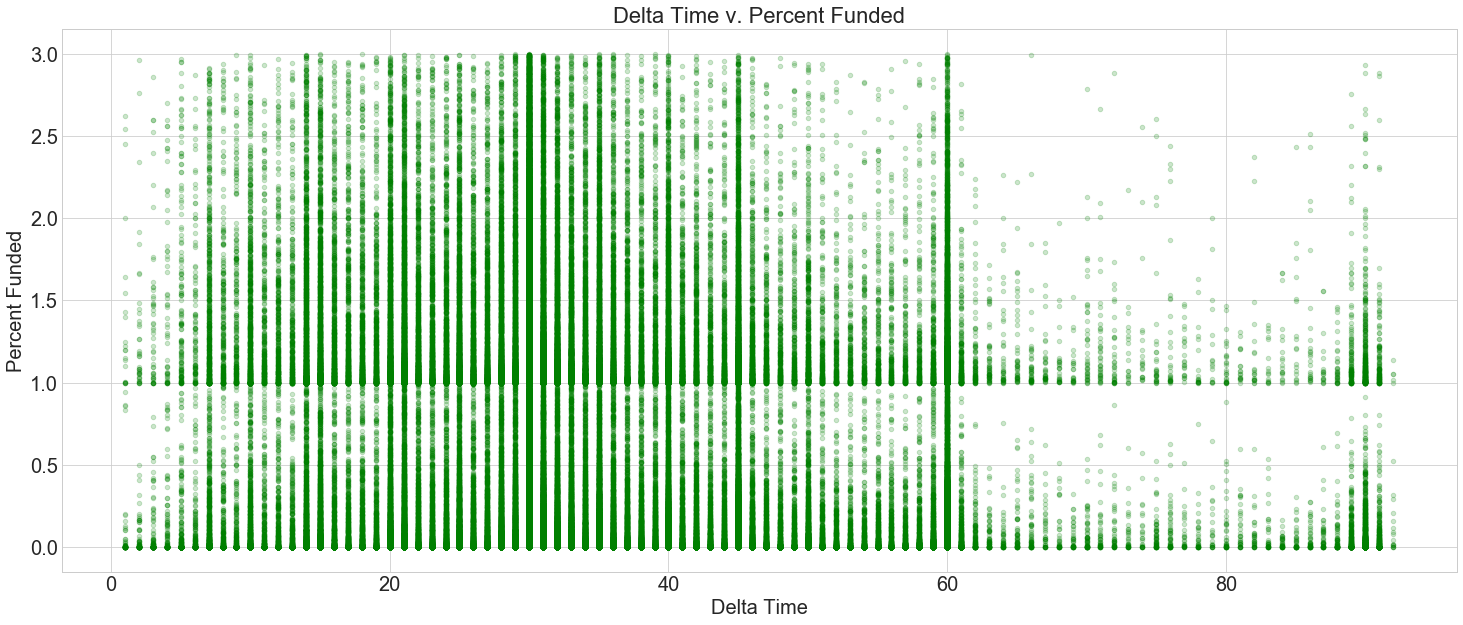

In [660]:
fig,ax = plt.subplots(1)
ks7.plot(ax=ax,
    kind='scatter', x='delta_time', y='percent_funded', 
         alpha=.2, figsize = (25,10), color='green', fontsize = 20
);

ax.set_title('Delta Time v. Percent Funded', fontsize=22)
ax.set_xlabel('Delta Time', fontsize=20)
ax.set_ylabel('Percent Funded', fontsize=20)

In [661]:
ks7

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,delta_time
name,,,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0,GB,0.00,0.00,1533.95,2015-08-11,12:12:28,0.000000,59
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02,04:43:57,0.080700,60
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12,00:20:50,0.004889,45
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.00,failed,1,US,1.00,1.00,5000.00,2012-03-17,03:24:11,0.000200,30
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-07-04,08:35:03,0.065795,56
Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26,13:38:27,1.047500,35
Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-21,1000.0,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01,18:30:44,1.205000,20
Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,453.00,failed,40,US,453.00,453.00,25000.00,2016-02-01,20:05:12,0.018120,45
SPIN - Premium Retractable In-Ear Headphones with Mic,Product Design,Design,USD,2014-05-29,125000.0,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-04-24,18:14:43,0.065864,35


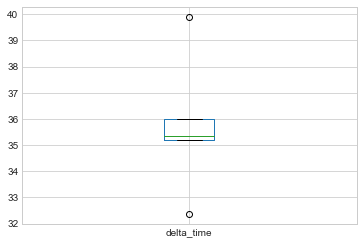

In [662]:
ks7.groupby('state').delta_time.mean().plot(kind='box')

In [663]:
ks7.sort_values(by='delta_time',ascending= False)

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,delta_time
name,,,,,,,,,,,,,,,,
The Secrets To Life,Rock,Music,USD,2011-04-01,3.000000e+03,470.00,failed,25,US,470.00,470.00,3.000000e+03,2010-12-30,10:01:11,0.156667,92
Legend of the Peach Girl,Video Games,Games,USD,2011-06-20,1.000000e+03,521.00,failed,14,US,521.00,521.00,1.000000e+03,2011-03-20,23:12:26,0.521000,92
'Do What You Love' Live your Dreams - a P. J. Galati Film.,Documentary,Film & Video,USD,2011-04-04,1.297700e+04,0.00,failed,0,US,0.00,0.00,1.297700e+04,2011-01-02,07:16:22,0.000000,92
Wales & The Welsh - the shaping of a people and a culture,Documentary,Film & Video,USD,2011-04-02,5.900000e+03,550.00,failed,15,US,550.00,550.00,5.900000e+03,2010-12-31,19:01:33,0.093220,92
Traditions Build Winners as the Snipe Class turns 80,Documentary,Film & Video,USD,2011-03-31,7.500000e+03,7625.00,successful,56,US,7625.00,7625.00,7.500000e+03,2010-12-29,23:22:08,1.016667,92
The new album by TA-80: Will Bury You!!,Rock,Music,USD,2011-04-04,5.000000e+02,20.80,failed,1,US,20.80,20.80,5.000000e+02,2011-01-02,10:52:58,0.041600,92
Uptown Praise Band 2nd Recording Project,Hip-Hop,Music,USD,2011-04-02,3.800000e+03,0.00,failed,0,US,0.00,0.00,3.800000e+03,2010-12-31,19:38:44,0.000000,92
Dark Timber Feature Film,Shorts,Film & Video,USD,2011-04-01,5.000000e+03,60.00,failed,4,US,60.00,60.00,5.000000e+03,2010-12-30,04:11:49,0.012000,92
Angie McClure's new album,Indie Rock,Music,USD,2011-04-04,5.000000e+03,5275.00,successful,63,US,5275.00,5275.00,5.000000e+03,2011-01-02,07:39:52,1.055000,92


In [664]:
ks7['state'].value_counts()

failed        197614
successful    117756
canceled       38619
live            2673
suspended       1740
Name: state, dtype: int64

In [665]:
ks['state'].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

what makes your startup successful on kickstarter?

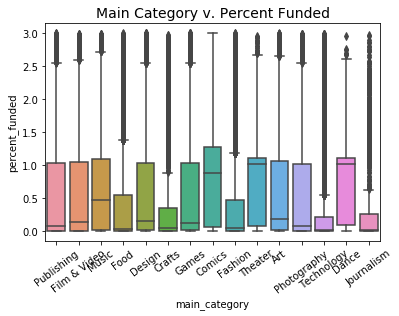

In [229]:
fig,ax = plt.subplots(1)
sns.boxplot(ax=ax, y=ks7["percent_funded"], x=ks7["main_category"])
ax.set_title('Main Category v. Percent Funded', fontsize=14)

for tick in ax.get_xticklabels():
        tick.set_rotation(37)

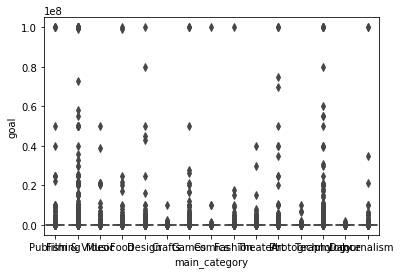

In [232]:
sns.boxplot( y=ks7["goal"], x=ks7["main_category"])

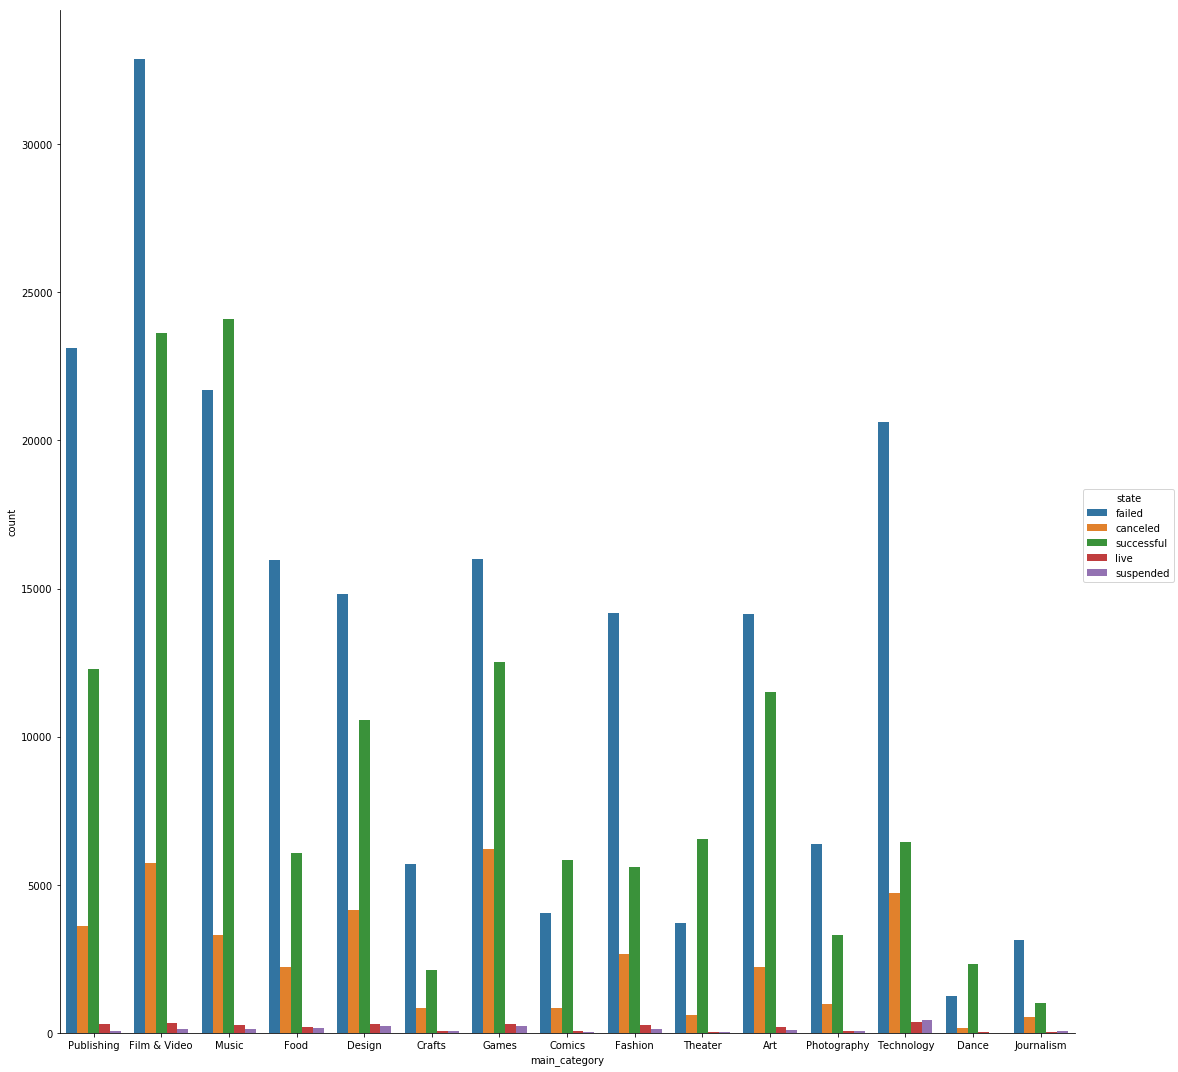

In [305]:
sns.factorplot('main_category',data=ks,kind='count',hue='state' ,size=15)

In [236]:
from sklearn.cluster import KMeans as kmeans

In [667]:
# ks['k'] = kmeans(n_clusters = 10).fit_predict.ks.loc[:,'Food':'Crafts']

In [668]:
ks['k'] = kmeans(n_clusters = 10)
ks['k']

name
The Songs of Adelaide & Abullah                                            KMeans(algorithm='auto', copy_x=True, init='k-...
Greeting From Earth: ZGAC Arts Capsule For ET                              KMeans(algorithm='auto', copy_x=True, init='k-...
Where is Hank?                                                             KMeans(algorithm='auto', copy_x=True, init='k-...
ToshiCapital Rekordz Needs Help to Complete Album                          KMeans(algorithm='auto', copy_x=True, init='k-...
Community Film Project: The Art of Neighborhood Filmmaking                 KMeans(algorithm='auto', copy_x=True, init='k-...
Monarch Espresso Bar                                                       KMeans(algorithm='auto', copy_x=True, init='k-...
Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co               KMeans(algorithm='auto', copy_x=True, init='k-...
Chaser Strips. Our Strips make Shots their B*tch!                          KMeans(algorithm='auto', copy_x=True, init='k

In [51]:
[ks['k']==4]

[name
 The Songs of Adelaide & Abullah                                            False
 Greeting From Earth: ZGAC Arts Capsule For ET                              False
 Where is Hank?                                                             False
 ToshiCapital Rekordz Needs Help to Complete Album                          False
 Community Film Project: The Art of Neighborhood Filmmaking                 False
 Monarch Espresso Bar                                                       False
 Support Solar Roasted Coffee & Green Energy!  SolarCoffee.co               False
 Chaser Strips. Our Strips make Shots their B*tch!                          False
 SPIN - Premium Retractable In-Ear Headphones with Mic                      False
 STUDIO IN THE SKY - A Documentary Feature Film (Canceled)                  False
 Of Jesus and Madmen                                                        False
 Lisa Lim New CD!                                                           False
 The Cotta

In [52]:
ks

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,k
name,,,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0,GB,0.00,0.00,1533.95,2015-08-11,12:12:28,0.000000,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02,04:43:57,0.080700,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12,00:20:50,0.004889,"KMeans(algorithm='auto', copy_x=True, init='k-..."
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.00,failed,1,US,1.00,1.00,5000.00,2012-03-17,03:24:11,0.000200,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-07-04,08:35:03,0.065795,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26,13:38:27,1.047500,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-21,1000.0,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01,18:30:44,1.205000,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,453.00,failed,40,US,453.00,453.00,25000.00,2016-02-01,20:05:12,0.018120,"KMeans(algorithm='auto', copy_x=True, init='k-..."
SPIN - Premium Retractable In-Ear Headphones with Mic,Product Design,Design,USD,2014-05-29,125000.0,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-04-24,18:14:43,0.065864,"KMeans(algorithm='auto', copy_x=True, init='k-..."


In [53]:
ks8 = ks.groupby('main_category').mean
ks8

<bound method GroupBy.mean of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x1a2e5adbe0>>

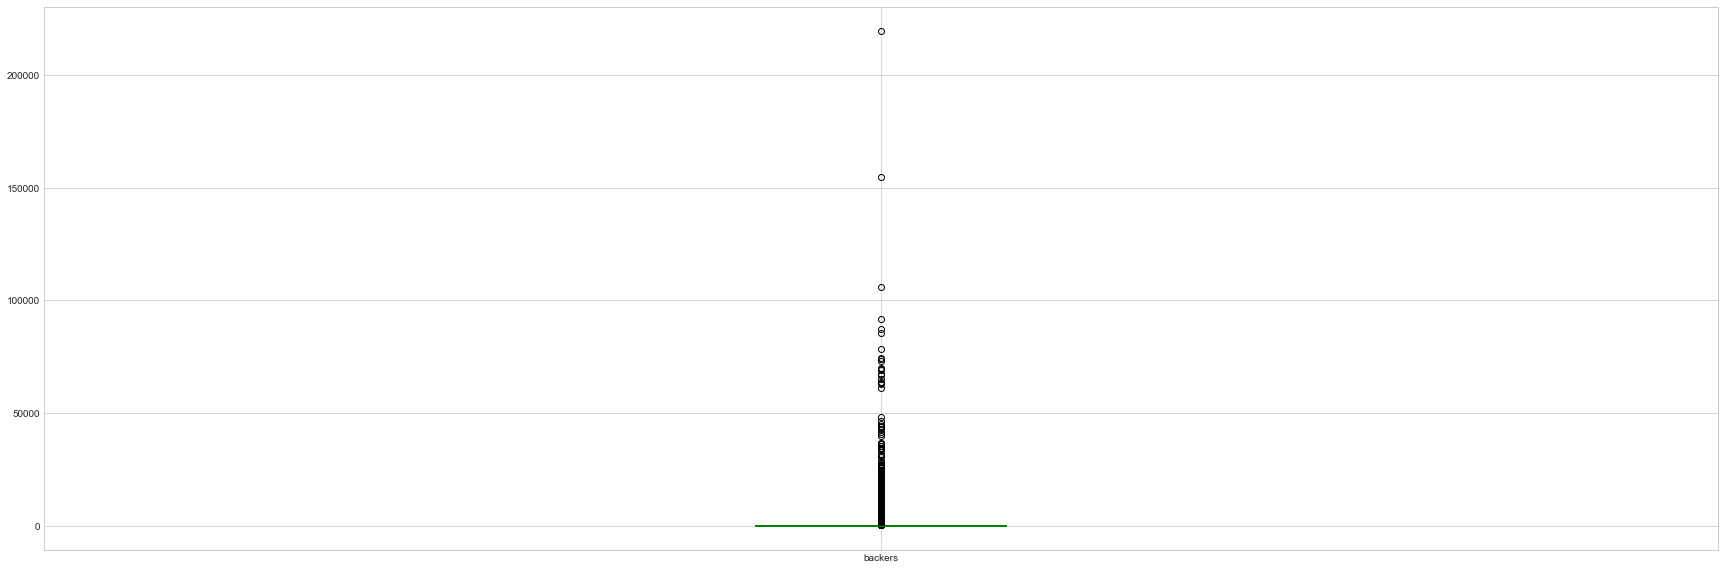

In [500]:
ks.plot(
    
    kind='box', 
    x="main_category", 
    y="backers", 
    color = "green",
    figsize = (30,10)
)

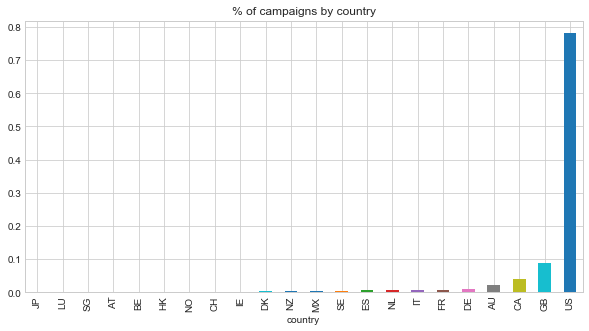

In [670]:
proportion_currency = ks.groupby(['country'])['country'].count() / ks['main_category'].count()
proportion_currency.sort_values(ascending=True).plot(kind='bar', title='% of campaigns by country', figsize=(10,5))

In [56]:
ks.currency.value_counts()

USD    292627
GBP     33672
EUR     17219
CAD     14756
AUD      7839
SEK      1757
MXN      1752
NZD      1447
DKK      1113
CHF       761
NOK       708
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

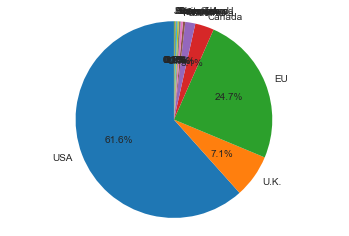

In [592]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

labels= ['USA', 'U.K.','EU', 'Canada','Austrailia','Sweeden','Mexico', 'New Zeland','Denmark','Switzerland', 'Norway', 'Hong Kong', 'Singapore', 'Japan']

sizes= [292627, 33672, 117219, 14756, 7839, 1757,1752,1447,1113,761,708,618,555,40]

plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [58]:
goal_fund = ks['goal'].groupby(ks['main_category'])
goal_fund.mean().reset_index(name='mean').sort_values(['mean'], ascending=False)

,main_category,mean
13,Technology,119629.259419
9,Journalism,88799.097240
6,Film & Video,85466.069456
8,Games,50714.432981
7,Food,48697.082467
4,Design,46735.798780
0,Art,40829.180144
12,Publishing,29434.131821
14,Theater,27542.578410
5,Fashion,24817.556586


In [59]:
ks['pledged'].describe()

count    3.748640e+05
mean     9.750436e+03
std      9.601043e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.200000e+02
75%      4.080000e+03
max      2.033899e+07
Name: pledged, dtype: float64

In [60]:
ks.main_category.value_counts()

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30067
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [61]:
ks.category.value_counts()

Product Design       22311
Documentary          16138
Tabletop Games       14178
Music                13340
Shorts               12357
Video Games          11829
Food                 11492
Film & Video          9224
Fiction               9168
Fashion               8554
Nonfiction            8317
Art                   8253
Apparel               7165
Theater               7056
Technology            6927
Rock                  6758
Children's Books      6756
Apps                  6345
Webseries             5762
Photography           5752
Indie Rock            5657
Publishing            5525
Narrative Film        5187
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3911
Hardware              3662
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Printing               238
Makerspaces            238
M

In [62]:
ks_film = ks[ks['main_category']=='Film & Video']
ks_film.head(10)

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,k
name,,,,,,,,,,,,,,,,
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02,04:43:57,0.080700,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12,00:20:50,0.004889,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-07-04,08:35:03,0.065795,"KMeans(algorithm='auto', copy_x=True, init='k-..."
STUDIO IN THE SKY - A Documentary Feature Film (Canceled),Documentary,Film & Video,USD,2014-08-10,65000.0,6240.57,canceled,43,US,6240.57,6240.57,65000.00,2014-07-11,21:55:48,0.096009,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,48905.00,successful,571,CA,43203.25,42174.03,15313.04,2014-11-14,18:02:00,2.754125,"KMeans(algorithm='auto', copy_x=True, init='k-..."
My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,57577.31,successful,840,US,10120.00,57577.31,50000.00,2017-04-03,17:11:33,1.151546,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Squatch Watchers,Webseries,Film & Video,USD,2013-08-23,10000.0,1373.37,failed,54,US,1373.37,1373.37,10000.00,2013-07-24,21:40:13,0.137337,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Zen in America: a film on Zen Buddhism in North America,Documentary,Film & Video,USD,2013-10-21,10000.0,15663.00,successful,213,US,15663.00,15663.00,10000.00,2013-09-21,23:00:54,1.566300,"KMeans(algorithm='auto', copy_x=True, init='k-..."
WE ARE ONE: STREET MUSIC OF NEW ORLEANS,Documentary,Film & Video,USD,2013-10-01,2500.0,0.00,failed,0,US,0.00,0.00,2500.00,2013-08-27,20:17:27,0.000000,"KMeans(algorithm='auto', copy_x=True, init='k-..."


In [63]:
ks_film.category.value_counts()


Documentary        16138
Shorts             12357
Film & Video        9224
Webseries           5762
Narrative Film      5187
Animation           2541
Drama               2178
Comedy              2125
Horror              1286
Television          1015
Thrillers            746
Science Fiction      744
Action               740
Music Videos         709
Experimental         551
Fantasy              345
Family               336
Festivals            291
Movie Theaters       232
Romance              190
Name: category, dtype: int64

In [64]:
ks_film['goal'].describe()

count    6.269700e+04
mean     8.546607e+04
std      1.750519e+06
min      1.500000e-01
25%      2.500000e+03
50%      7.000000e+03
75%      2.000000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [65]:
ks_film['usd pledged'].quantile(0.90)

12036.876

In [66]:
print(415/626970)
print(ks_film.state.value_counts())

0.0006619136481809337
failed        32892
successful    23612
canceled       5744
live            332
suspended       117
Name: state, dtype: int64


In [67]:
print(23612/(32892+5744+332+117))
ks_film.sort_values(['goal'], ascending=True)

0.6041192273250607


,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,k
name,,,,,,,,,,,,,,,,
Nana,Shorts,Film & Video,USD,2012-03-16,1.500000e-01,0.0,failed,0,US,0.00,0.00,1.500000e-01,2012-01-25,07:23:19,0.000000e+00,"KMeans(algorithm='auto', copy_x=True, init='k-..."
RocknRoll NoisePollution,Documentary,Film & Video,USD,2011-07-19,5.000000e-01,0.0,failed,0,US,0.00,0.00,5.000000e-01,2011-07-12,15:59:39,0.000000e+00,"KMeans(algorithm='auto', copy_x=True, init='k-..."
THE APARTMENTS,Film & Video,Film & Video,USD,2011-12-14,1.000000e+00,325.0,successful,4,US,325.00,325.00,1.000000e+00,2011-11-14,07:34:55,3.250000e+02,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Football animation,Animation,Film & Video,GBP,2015-11-11,1.000000e+00,2.0,successful,2,GB,3.09,3.04,1.520000e+00,2015-10-22,10:05:34,2.000000e+00,"KMeans(algorithm='auto', copy_x=True, init='k-..."
The Glamour & The Squalor: Distribution,Documentary,Film & Video,USD,2015-06-13,1.000000e+00,6256.0,successful,108,US,6256.00,6256.00,1.000000e+00,2015-06-01,23:38:01,6.256000e+03,"KMeans(algorithm='auto', copy_x=True, init='k-..."
DAMNATION WOODS: A film by Jerry Smith,Film & Video,Film & Video,USD,2011-08-24,1.000000e+00,35.0,successful,2,US,35.00,35.00,1.000000e+00,2011-08-10,22:16:52,3.500000e+01,"KMeans(algorithm='auto', copy_x=True, init='k-..."
THE SKY HAS FALLEN - Independent Horror Film,Narrative Film,Film & Video,USD,2011-08-20,1.000000e+00,2795.0,successful,24,US,2795.00,2795.00,1.000000e+00,2011-06-11,13:48:18,2.795000e+03,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Boomer Hogs gang,Film & Video,Film & Video,USD,2016-07-07,1.000000e+00,27.0,successful,3,US,27.00,27.00,1.000000e+00,2016-06-07,17:24:06,2.700000e+01,"KMeans(algorithm='auto', copy_x=True, init='k-..."
PROJECT TOYS TUBE CHANNEL (Suspended) (Suspended),Film & Video,Film & Video,USD,2015-12-18,1.000000e+00,2.0,suspended,2,US,2.00,2.00,1.000000e+00,2015-10-19,21:44:35,2.000000e+00,"KMeans(algorithm='auto', copy_x=True, init='k-..."


In [86]:
ks

,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,launched_time,percent_funded,k
name,,,,,,,,,,,,,,,,
The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,0.00,failed,0,GB,0.00,0.00,1533.95,2015-08-11,12:12:28,0.000000,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-09-02,04:43:57,0.080700,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,220.00,failed,3,US,220.00,220.00,45000.00,2013-01-12,00:20:50,0.004889,"KMeans(algorithm='auto', copy_x=True, init='k-..."
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,1.00,failed,1,US,1.00,1.00,5000.00,2012-03-17,03:24:11,0.000200,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-07-04,08:35:03,0.065795,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26,13:38:27,1.047500,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-21,1000.0,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01,18:30:44,1.205000,"KMeans(algorithm='auto', copy_x=True, init='k-..."
Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,453.00,failed,40,US,453.00,453.00,25000.00,2016-02-01,20:05:12,0.018120,"KMeans(algorithm='auto', copy_x=True, init='k-..."
SPIN - Premium Retractable In-Ear Headphones with Mic,Product Design,Design,USD,2014-05-29,125000.0,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-04-24,18:14:43,0.065864,"KMeans(algorithm='auto', copy_x=True, init='k-..."


In [91]:
ks['main_category'].value_counts()

Film & Video    62697
Music           49530
Publishing      39379
Games           35226
Technology      32562
Design          30067
Art             28153
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [ ]:
fig,ax = plt.subplots(1)
#ks["launched_date"].plot(ax=ax)

ks7.plot.bar(ax=ax, x="launched_date",color = "green", figsize = (30,10)
);

In [ ]:
ks["launched_date"].plot()

In [588]:
print(smf.ols('goal ~ main_category',data=ks).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   goal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.56
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.44e-50
Time:                        21:16:18   Log-Likelihood:            -5.8323e+06
No. Observations:              378660   AIC:                         1.166e+07
Df Residuals:                  378645   BIC:                         1.166e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [602]:
print(smf.ols('percent_funded ~ goal',data=ks).fit().summary())

                            OLS Regression Results                            
Dep. Variable:         percent_funded   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08577
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.770
Time:                        22:20:59   Log-Likelihood:            -2.6524e+06
No. Observations:              378660   AIC:                         5.305e+06
Df Residuals:                  378658   BIC:                         5.305e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2496      0.434      7.493      0.0

In [597]:
print(smf.ols('goal ~ percent_funded',data=ks).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   goal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08577
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.770
Time:                        22:10:32   Log-Likelihood:            -5.8324e+06
No. Observations:              378660   AIC:                         1.166e+07
Df Residuals:                  378658   BIC:                         1.166e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.909e+04   1923.255     25.

In [594]:
def year_cut(string):
    return string[0:4]

ks['year'] = ks['launched'].apply(year_cut)

ks['year'] = ks['year'].astype(int)

In [595]:
ks['year'].value_counts()

2015    77299
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: year, dtype: int64

In [404]:
ks_yr = {}
for year in range(2009, 2019):
    ks_yr[year] = ks[ks['year'] == year]['year'].count()

In [405]:
ks_yr = pd.Series(ks_yr)
ks_yr = pd.DataFrame(ks_yr)
ks_yr = ks_yr.rename(columns = {0: "counts"})
ks_yr

,counts
2009,1329
2010,10519
2011,26237
2012,41165
2013,44851
2014,67745
2015,77300
2016,57184
2017,52200
2018,124


Text(0,0.5,'Frequency')

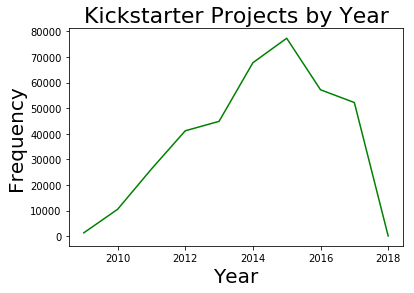

In [420]:
fig,ax = plt.subplots(1)
ks_yr['counts'].plot(ax=ax,
           color='green');


ax.set_title('Kickstarter Projects by Year', fontsize=22)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)

In [498]:
pivot_yr2 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['year'],
                       columns=['state'], 
                       aggfunc="count" 
                       #title = "Category vs. State"
                       )
pivot_yr2
pivot_yr2["Total"] = pivot_yr2.sum(axis=1)
pivot_yr2 = pivot_yr.apply(lambda x: (x / pivot_yr2["Total"])*100)
# pivot_yr2["Count"] = pivot_yr['Total']
pivot_yr2

state,canceled,failed,live,successful,suspended,undefined,Total
year,,,,,,,
1970,85.714286,NaN,NaN,NaN,14.285714,NaN,100.0
2009,11.286682,45.146727,NaN,3.278148,NaN,NaN,100.0
2010,8.803118,47.380930,NaN,0.415095,0.152106,NaN,100.0
2011,8.171666,45.271944,NaN,0.176806,0.167702,NaN,100.0
2012,6.391352,50.013361,NaN,0.105585,0.126321,0.004858,100.0
2013,8.227241,48.351207,NaN,0.096515,0.129317,0.004459,100.0
2014,10.949886,56.386449,NaN,0.045991,0.398553,1.108569,100.0
2015,11.548512,57.310479,NaN,0.035096,0.932730,3.078913,100.0
2016,12.449287,53.382065,0.003497,0.057388,0.601567,0.746712,100.0


In [397]:
pivot_yr = pd.pivot_table(ks, 
                       values='goal', 
                       index=['year'],
                       columns=['state'], 
                       aggfunc="count" 
                       #title = "Category vs. State"
                       )
pivot_yr
pivot_yr["Total"] = pivot_yr.sum(axis=1)
# pivot_yr = pivot_yr.apply(lambda x: (x / pivot_yr["Total"])*100)
# pivot_yr["Count"] = pivot_yr['Total']
pivot_yr.fillna(0)
pivot_yr

state,canceled,failed,live,successful,suspended,undefined,Total
year,,,,,,,
1970,6.0,NaN,NaN,NaN,1.0,NaN,7.0
2009,150.0,600.0,NaN,579.0,NaN,NaN,1329.0
2010,926.0,4984.0,NaN,4593.0,16.0,NaN,10519.0
2011,2144.0,11878.0,NaN,12171.0,44.0,NaN,26237.0
2012,2631.0,20588.0,NaN,17892.0,52.0,2.0,41165.0
2013,3690.0,21686.0,NaN,19415.0,58.0,2.0,44851.0
2014,7418.0,38199.0,NaN,21107.0,270.0,751.0,67745.0
2015,8927.0,44301.0,NaN,20971.0,721.0,2380.0,77300.0
2016,7119.0,30526.0,2.0,18766.0,344.0,427.0,57184.0


In [387]:
pivot_yr.style.apply(highlight_max,axis=0)

state,canceled,failed,live,successful,suspended,undefined,Total
year,,,,,,,
1970,6,nan,nan,nan,1,nan,7
2009,150,600,nan,579,nan,nan,1329
2010,926,4984,nan,4593,16,nan,10519
2011,2144,11878,nan,12171,44,nan,26237
2012,2631,20588,nan,17892,52,2,41165
2013,3690,21686,nan,19415,58,2,44851
2014,7418,38199,nan,21107,270,751,67745
2015,8927,44301,nan,20971,721,2380,77300
2016,7119,30526,2,18766,344,427,57184


In [399]:
pivot_yr.fillna(0).style.apply(highlight_max,axis=0)

state,canceled,failed,live,successful,suspended,undefined,Total
year,,,,,,,
1970,6,0,0,0,1,0,7
2009,150,600,0,579,0,0,1329
2010,926,4984,0,4593,16,0,10519
2011,2144,11878,0,12171,44,0,26237
2012,2631,20588,0,17892,52,2,41165
2013,3690,21686,0,19415,58,2,44851
2014,7418,38199,0,21107,270,751,67745
2015,8927,44301,0,20971,721,2380,77300
2016,7119,30526,2,18766,344,427,57184


In [406]:
ks_yr

,counts
2009,1329
2010,10519
2011,26237
2012,41165
2013,44851
2014,67745
2015,77300
2016,57184
2017,52200
2018,124


In [409]:
pivot_yr2 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['year'],
                       columns=['state'], 
                       aggfunc="count" 
                       #title = "Category vs. State"
                       )
pivot_yr2
pivot_yr2["Total"] = pivot_yr2.sum(axis=1)
pivot_yr2 = pivot_yr2.apply(lambda x: (x / pivot_yr2["Total"])*100)
pivot_yr2["Count"] = pivot_yr['Total']
pivot_yr2.fillna(0)
pivot_yr2

state,canceled,failed,live,successful,suspended,undefined,Total,Count
year,,,,,,,,
1970,85.714286,NaN,NaN,NaN,14.285714,NaN,100.0,7.0
2009,11.286682,45.146727,NaN,43.566591,NaN,NaN,100.0,1329.0
2010,8.803118,47.380930,NaN,43.663846,0.152106,NaN,100.0,10519.0
2011,8.171666,45.271944,NaN,46.388688,0.167702,NaN,100.0,26237.0
2012,6.391352,50.013361,NaN,43.464108,0.126321,0.004858,100.0,41165.0
2013,8.227241,48.351207,NaN,43.287775,0.129317,0.004459,100.0,44851.0
2014,10.949886,56.386449,NaN,31.156543,0.398553,1.108569,100.0,67745.0
2015,11.548512,57.310479,NaN,27.129366,0.932730,3.078913,100.0,77300.0
2016,12.449287,53.382065,0.003497,32.816872,0.601567,0.746712,100.0,57184.0


In [410]:
pivot_yr2['successful']

year
1970          NaN
2009    43.566591
2010    43.663846
2011    46.388688
2012    43.464108
2013    43.287775
2014    31.156543
2015    27.129366
2016    32.816872
2017    35.367816
2018          NaN
Name: successful, dtype: float64

In [412]:
ks_yr['successful']=pivot_yr2['successful']
ks_yr

,counts,successful
2009,1329,43.566591
2010,10519,43.663846
2011,26237,46.388688
2012,41165,43.464108
2013,44851,43.287775
2014,67745,31.156543
2015,77300,27.129366
2016,57184,32.816872
2017,52200,35.367816
2018,124,NaN


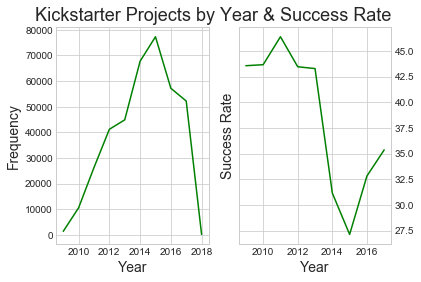

In [457]:
fig,ax = plt.subplots(1,2)
sns.set_style("whitegrid")

ks_yr['counts'].plot(ax=ax[0],
           color='green');
ks_yr['successful'].plot(ax=ax[1], color='green')


# ax1.set_title(1,2,'Kickstarter Projects by Year', fontsize=18)
ax[0].set_xlabel('Year', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[1].set_ylabel('Success Rate', fontsize=14)
ax[1].set_xlabel('Year', fontsize=14)
plt.title('Kickstarter Projects by Year & Success Rate', fontsize=18, loc='right')
ax[1].yaxis.tick_right()


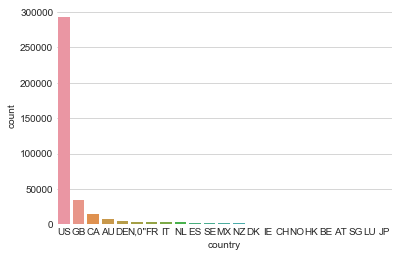

In [495]:
sns.set_style("whitegrid")
sns.countplot(ks['country'], order = ks['country'].value_counts().index)
sns.despine(bottom = True, left = True)

In [504]:
pivot_yr3 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['year'],
                       columns=['main_category'], 
                       aggfunc="count" 
                       #title = "Category vs. State"
                       )
pivot_yr3
pivot_yr3["Total"] = pivot_yr3.sum(axis=1)
pivot_yr3 = pivot_yr3.apply(lambda x: (x / pivot_yr3["Total"])*100)
pivot_yr3["Count"] = pivot_yr['Total']
pivot_yr3.fillna(0)
pivot_yr3

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,Total,Count
year,,,,,,,,,,,,,,,,,
1970,14.285714,NaN,NaN,NaN,14.285714,NaN,28.571429,NaN,NaN,NaN,14.285714,NaN,14.285714,NaN,14.285714,100.0,7.0
2009,12.716328,1.730625,0.827690,0.601956,2.332581,1.956358,24.755455,2.407825,3.461249,3.085026,22.197141,5.492852,9.706546,4.514673,4.213695,100.0,1329.0
2010,8.137656,2.528757,0.522863,1.606617,1.578097,1.644643,35.031847,2.452705,2.224546,1.787242,23.443293,4.430079,6.702158,2.138987,5.770511,100.0,10519.0
2011,8.918703,2.248733,0.445935,1.574113,3.441704,2.298281,30.502725,2.393566,3.052941,0.647940,25.212486,3.315928,8.598544,1.741815,5.606586,100.0,26237.0
2012,8.339609,2.830074,0.767642,1.238917,4.472246,4.000972,22.830074,4.396939,6.758168,0.675331,21.523139,2.876230,12.994048,1.974979,4.321632,100.0,41165.0
2013,7.669840,3.112528,1.076899,1.206216,7.237297,5.373347,21.259281,5.036677,9.119083,0.465987,15.384272,2.762480,12.936166,4.071258,3.288667,100.0,44851.0
2014,7.445568,2.335228,2.837110,1.039191,7.962211,6.407853,14.696288,9.538711,8.868551,1.372795,11.147686,3.507270,10.650232,9.529855,2.661451,100.0,67745.0
2015,6.883571,2.486417,3.346701,0.805951,8.673997,6.826649,13.197930,7.971539,9.596378,1.904269,11.060802,2.833118,9.679172,12.554981,2.178525,100.0,77300.0
2016,6.262241,3.270145,3.100518,0.751959,10.331561,7.210059,12.157247,6.634723,12.139759,1.468942,10.149692,2.343313,9.906617,12.293649,1.979575,100.0,57184.0


In [508]:
pivot_yr3.fillna(0).style.apply(highlight_max,axis=0)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,Total,Count
year,,,,,,,,,,,,,,,,,
1970,14.2857,0,0,0,14.2857,0,28.5714,0,0,0,14.2857,0,14.2857,0,14.2857,100,7
2009,12.7163,1.73062,0.82769,0.601956,2.33258,1.95636,24.7555,2.40783,3.46125,3.08503,22.1971,5.49285,9.70655,4.51467,4.21369,100,1329
2010,8.13766,2.52876,0.522863,1.60662,1.5781,1.64464,35.0318,2.4527,2.22455,1.78724,23.4433,4.43008,6.70216,2.13899,5.77051,100,10519
2011,8.9187,2.24873,0.445935,1.57411,3.4417,2.29828,30.5027,2.39357,3.05294,0.64794,25.2125,3.31593,8.59854,1.74181,5.60659,100,26237
2012,8.33961,2.83007,0.767642,1.23892,4.47225,4.00097,22.8301,4.39694,6.75817,0.675331,21.5231,2.87623,12.994,1.97498,4.32163,100,41165
2013,7.66984,3.11253,1.0769,1.20622,7.2373,5.37335,21.2593,5.03668,9.11908,0.465987,15.3843,2.76248,12.9362,4.07126,3.28867,100,44851
2014,7.44557,2.33523,2.83711,1.03919,7.96221,6.40785,14.6963,9.53871,8.86855,1.3728,11.1477,3.50727,10.6502,9.52985,2.66145,100,67745
2015,6.88357,2.48642,3.3467,0.805951,8.674,6.82665,13.1979,7.97154,9.59638,1.90427,11.0608,2.83312,9.67917,12.555,2.17853,100,77300
2016,6.26224,3.27015,3.10052,0.751959,10.3316,7.21006,12.1572,6.63472,12.1398,1.46894,10.1497,2.34331,9.90662,12.2936,1.97957,100,57184


In [593]:
pivot_yr4 = pd.pivot_table(ks, 
                       values='goal', 
                       index=['year'],
                       columns=['main_category'], 
                       aggfunc="count"
                       #title = "Category vs. State"
                       )
pivot_yr4
pivot_yr4.fillna(0)
pivot_yr4 = pivot_yr4.drop(1970)
pivot_yr4["Average Project"] = pivot_yr3.sum(axis=1)
pivot_yr4
pivot_yr4.fillna(0).style.apply(highlight_max,axis=0)

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,Average Project
year,,,,,,,,,,,,,,,,
2009,169,23,11,8,31,26,329,32,46,41,295,73,129,60,56,1529
2010,856,266,55,169,166,173,3685,258,234,188,2466,466,705,225,607,10719
2011,2340,590,117,413,903,603,8003,628,801,170,6615,870,2256,457,1471,26437
2012,3433,1165,316,510,1841,1647,9398,1810,2782,278,8860,1184,5349,813,1779,41365
2013,3440,1396,483,541,3246,2410,9535,2259,4090,209,6900,1239,5802,1826,1475,45051
2014,5044,1582,1922,704,5394,4341,9956,6462,6008,930,7552,2376,7215,6456,1803,67945
2015,5321,1922,2587,623,6705,5277,10202,6162,7418,1472,8550,2190,7481,9705,1684,77500
2016,3581,1870,1773,430,5908,4123,6952,3794,6942,840,5804,1340,5665,7030,1132,57384
2017,3950,2002,1542,370,5866,4210,5513,3192,6893,623,4857,1039,5254,5986,903,52400


Text(0,0.5,'Frequency')

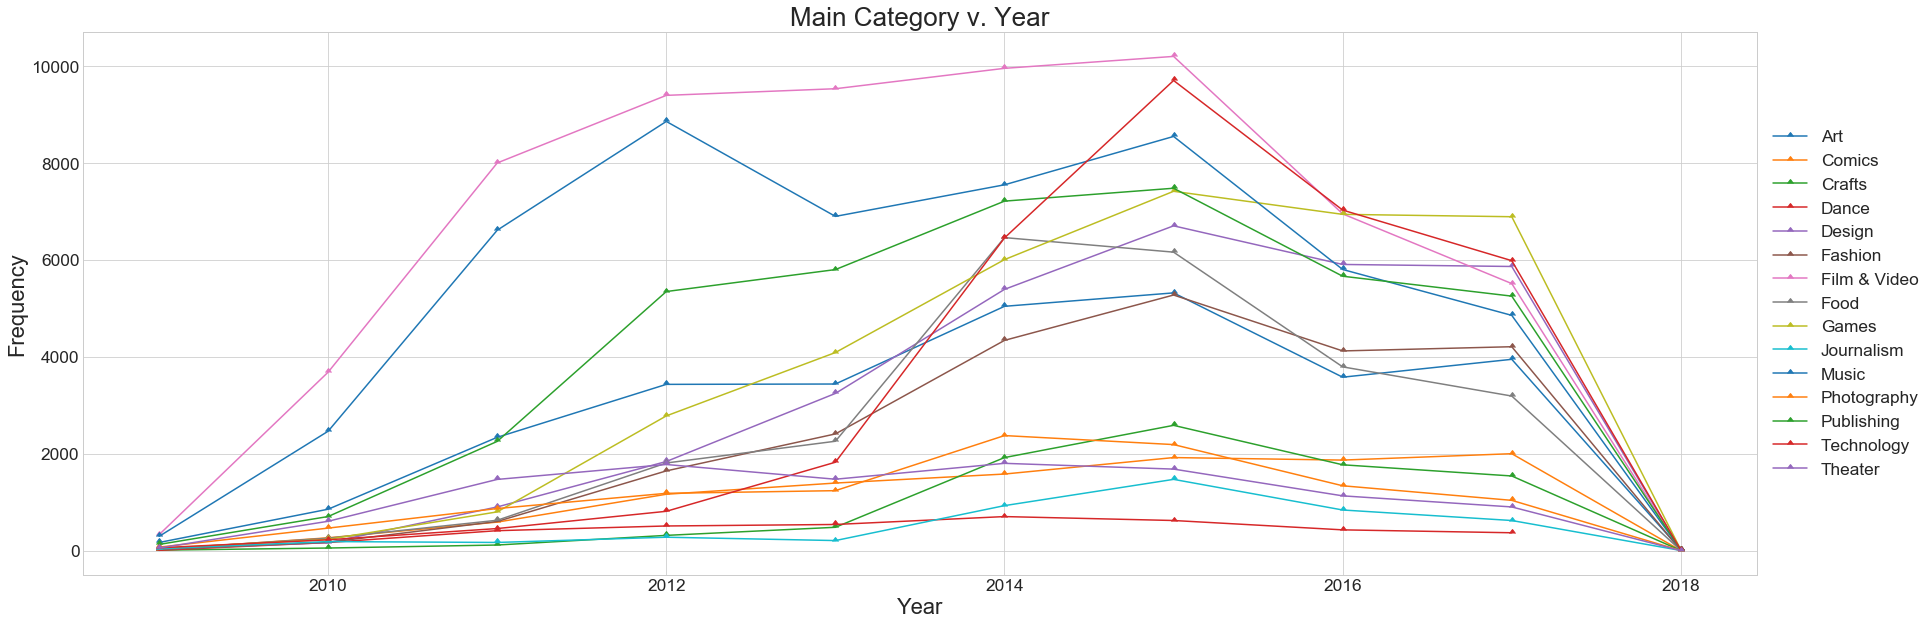

In [576]:
fig,ax = plt.subplots(1)
pivot_yr4.plot(ax=ax, figsize=(30,10), marker=10, fontsize='xx-large')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize='xx-large')
ax.set_title('Main Category v. Year', fontsize=26)
ax.set_xlabel("Year", fontsize=22)
ax.set_ylabel("Frequency", fontsize=22)

In [671]:
print('final data bootcamp project finished')

final data bootcamp project finished
